In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

In [2]:
x = np.linspace(0,1,5)

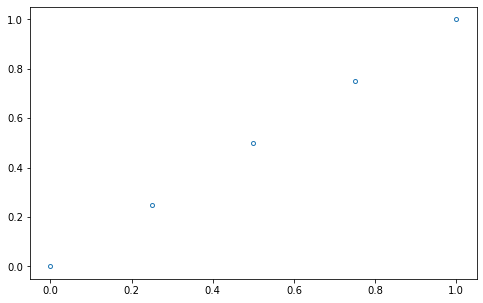

In [3]:
fig, ax = plt.subplots(figsize = (8,5))
ax.plot(x,x, 'oC0', fillstyle = 'none', ms = 12/3)

In [4]:
target = cv2.cvtColor(cv2.imread('target_outline.jpg', 1), cv2.COLOR_BGR2RGB)

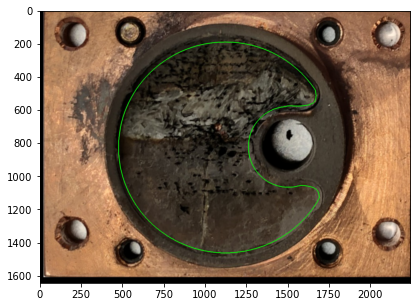

In [5]:
fig, ax = plt.subplots(figsize = (8,5))
ax.imshow(target)

In [449]:
pixel = [(681.3000000000001, 1157.75), (1158.95, 1149.5500000000002), (1210.2, 594.0)]
mirror = [(5000.0, 5000.0),(0, 5000),(0, -4000)]

In [450]:
transformation = cv2.getAffineTransform(np.asarray(pixel, dtype = 'float32'),
                                        np.asarray(mirror, dtype = 'float32'))
transformation_to_pixels = cv2.getAffineTransform(np.asarray(mirror, dtype = 'float32'),
                                        np.asarray(pixel, dtype = 'float32'))

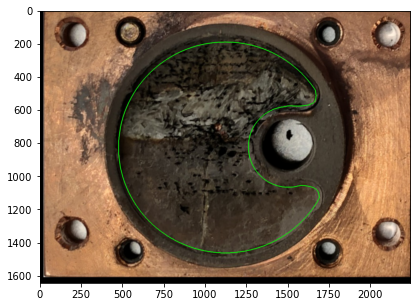

In [451]:
fig, ax = plt.subplots(figsize = (8,5))
ax.imshow(target)

In [568]:
def transform_image_to_mirror(image):
    transform = lambda c: np.dot(transformation, c+[1])
    s = list(image.shape[:2])
    mirror_coords_corners = []
    mirror_coords_corners.append(transform([0,0]))
    mirror_coords_corners.append(transform([0,s[0]]))
    mirror_coords_corners.append(transform([s[1],0]))
    mirror_coords_corners.append(transform(list(s)[::-1]))
    offset = -np.min(mirror_coords_corners, axis = 0)

    y,x = np.arange(image.shape[0]), np.arange(image.shape[1])
    X,Y = np.meshgrid(x,y)
    Z = np.ones(list(X.shape)+[3])
    Z[:,:,0] = X
    Z[:,:,1] = Y
    mirror_coords_image = np.einsum('ij,klj->kli', transformation, Z)
    mirror_coords_image[:,:,0] -= mirror_coords_image[:,:,0].min()
    mirror_coords_image[:,:,1] -= mirror_coords_image[:,:,1].min()
    
    return mirror_coords_corners, mirror_coords_image

In [569]:
corners, mirror_coords_image = transform_image_to_mirror(target)

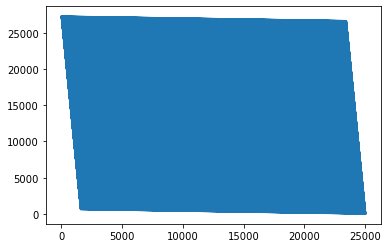

In [570]:
plt.plot(mirror_coords_image[:,:,0].flatten(), mirror_coords_image[:,:,1].flatten(), '-')

In [575]:
offset = -np.min(corners, axis = 0)
mirror_offset = np.asarray(mirror, dtype = 'float32')
mirror_offset[:,0] += offset[0]
mirror_offset[:,1] += offset[1]
transformation_offset = cv2.getAffineTransform(np.asarray(pixel, dtype = 'float32'),mirror_offset)

In [586]:
dim = np.ptp(corners, axis = 0).astype(int)
im = cv2.warpAffine(target, transformation_offset, tuple(dim))
resized = cv2.resize(im,target.shape[:2][::-1])

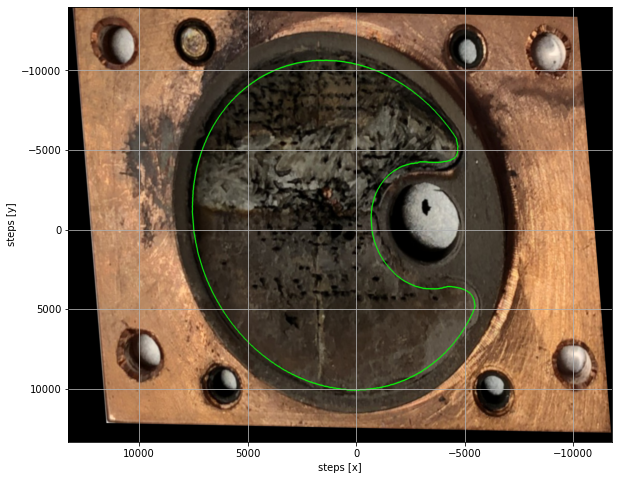

In [619]:
extent = [0-offset[0], dim[0]-offset[0], dim[1]-offset[1], 0-offset[1]]
fig, ax = plt.subplots(figsize = (12,8))
ax.imshow(resized, extent = extent, aspect = target.shape[0]/target.shape[1])

ax.set_xlabel('steps [x]')
ax.set_ylabel('steps [y]')

ax.invert_xaxis()
ax.grid(True)

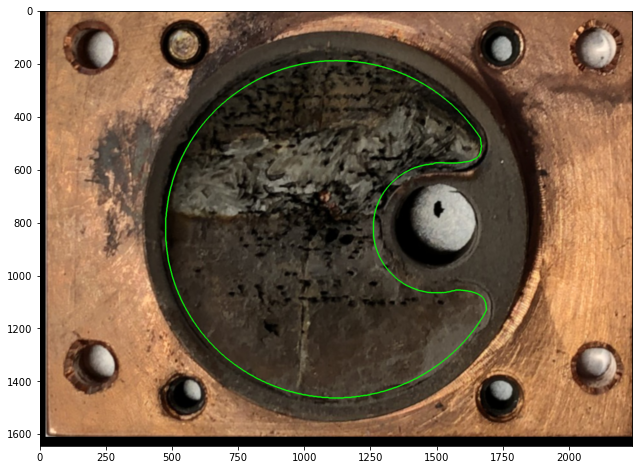

In [585]:
fig, ax = plt.subplots(figsize = (12,8))
ax.imshow(target)

In [558]:
offset

array([10201.47039627, 13975.26517245])

In [561]:
transformation@(list(target.shape[:2][::-1])+[1])

array([-11791.55811998,  13323.44796258])

In [563]:
transformation@(0,0,1)

array([ 13262.88748723, -13975.26517245])